In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
import os
os.chdir("drive/MyDrive/Temitope_Project/Data/")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_excel('Volve_production_data.xlsx')
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [ ]:
df.shape

(15634, 24)

In [ ]:
df.describe()

,NPD_WELL_BORE_CODE,NPD_FIELD_CODE,NPD_FACILITY_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,15634.000000,15634.0,15634.0,15349.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.000000,15340.000000,9161.000000,9161.000000,9161.000000,5706.000000
mean,5908.581745,3420717.0,369304.0,19.994093,181.803869,77.162969,154.028787,14.856100,55.168533,45.377811,67.728440,11.441060,1095.631548,161049.059703,1672.151332,5315.480815
std,649.231622,0.0,0.0,8.369978,109.712363,45.657948,76.752373,8.406822,36.692924,24.752631,27.719028,19.816928,1323.538151,188136.410434,1706.982853,2181.486695
min,5351.000000,3420717.0,369304.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000,0.000000
25%,5599.000000,3420717.0,369304.0,24.000000,0.000000,0.000000,83.665361,10.841437,18.952989,31.148062,56.577834,0.000000,190.690000,29430.590000,19.870000,4338.204674
50%,5693.000000,3420717.0,369304.0,24.000000,232.896939,103.186689,175.588861,16.308598,52.096877,37.933620,80.071250,2.384969,557.550000,87749.660000,1097.790000,5504.739769
75%,5769.000000,3420717.0,369304.0,24.000000,255.401455,106.276591,204.319964,21.306125,99.924288,57.101268,88.062202,13.765020,1345.200000,202482.300000,3260.950000,6781.058040
max,7405.000000,3420717.0,369304.0,25.000000,397.588550,108.502178,345.906770,30.019828,100.000000,137.311030,93.509584,125.718570,5901.840000,851131.520000,8019.740000,10013.600000


In [ ]:
#looking at the BORE_WAT_VOL summary we have outliers
#observing the descriptive statistics i noticed negative values in the bore_wat_vol column
#so I investigated further for other possible nagative values
df[df.BORE_WAT_VOL < 0]

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
1982,2008-04-23,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,24.000,260.557935,...,%,91.859980,73.584250,60.253108,2735.53,422115.01,-14.19,NaN,production,OP
3502,2012-08-13,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,0.625,0.000000,...,%,50.951032,89.012162,21.297284,632.96,12123.37,-457.84,NaN,production,OP
5350,2009-03-03,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.000,270.291285,...,%,101.986203,79.554519,68.800869,4339.13,616094.56,-0.95,NaN,production,OP
6558,2012-08-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.625,252.892348,...,%,46.152546,83.714672,17.203700,202.53,3754.12,-59.19,NaN,production,OP


In [ ]:
#so we replaced the outliers with 0
df.BORE_WAT_VOL.replace({-14.19:0,-457.84:0,-0.95:0,-59.19:0},inplace=True)


In [ ]:
#to confirm that it has been rectified
df[df.BORE_WAT_VOL < 0]

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE


In [ ]:
#Data Exploration
df1 = df.set_index('DATEPRD')
df1.head()

,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
DATEPRD,,,,,,,,,,,,,,,,,,,,,
2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,96.87589,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [ ]:
#for a smoother plot we have resampled the number of observation monthly
df_daily = df1.resample('M').mean()

<ipython-input-12-ed069ed034dc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df1.resample('M').mean()


<Axes: xlabel='DATEPRD'>

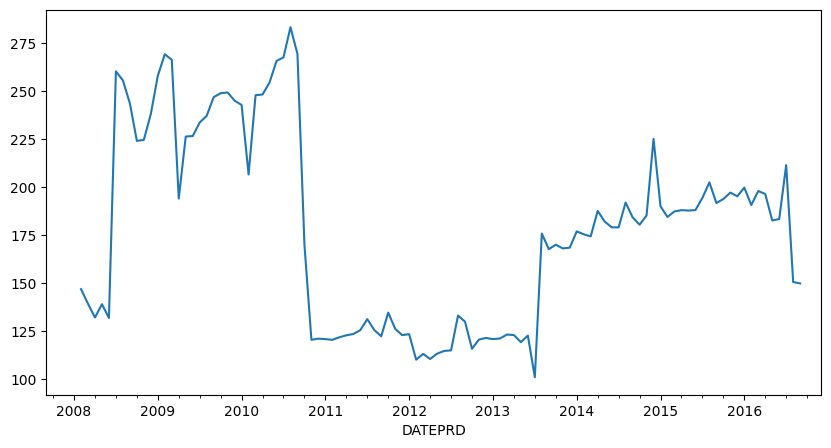

In [ ]:
#for the average downhole pressure
fig = plt.figure(figsize=(10,5))
df_daily.AVG_DOWNHOLE_PRESSURE.plot()

<Axes: xlabel='DATEPRD'>

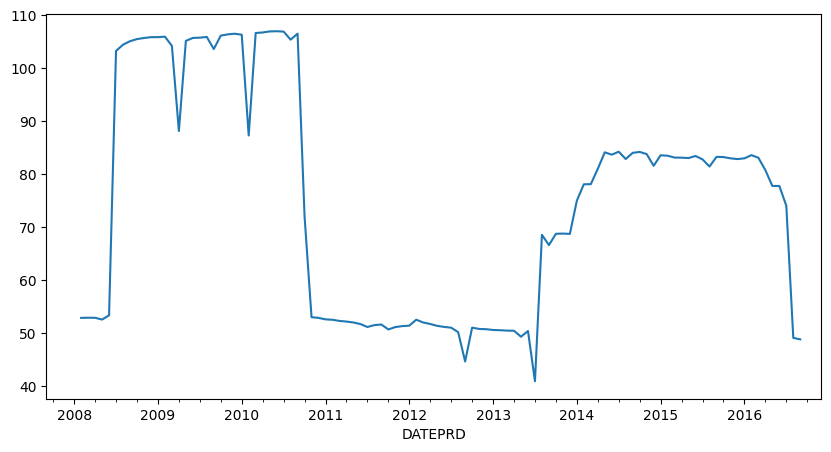

In [ ]:
fig = plt.figure(figsize=(10,5))
df_daily.AVG_DOWNHOLE_TEMPERATURE.plot()

<Axes: xlabel='DATEPRD'>

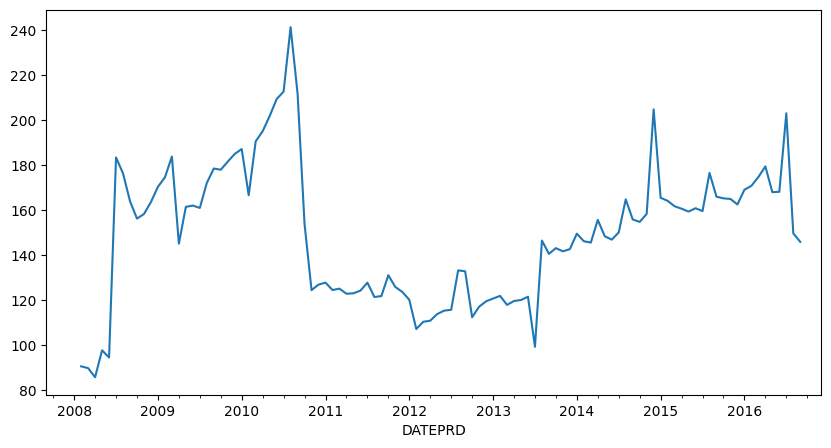

In [ ]:
fig = plt.figure(figsize=(10,5))
df_daily.AVG_DP_TUBING.plot()

<Axes: xlabel='DATEPRD'>

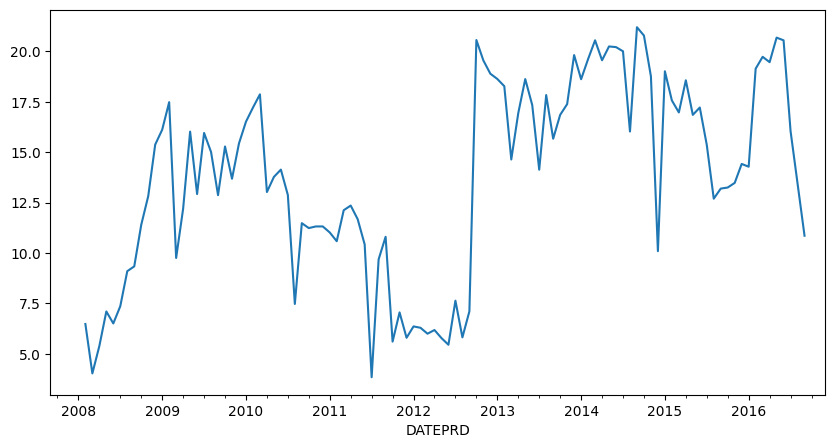

In [ ]:
fig = plt.figure(figsize=(10,5))
df_daily.AVG_ANNULUS_PRESS.plot()

<Axes: xlabel='DATEPRD'>

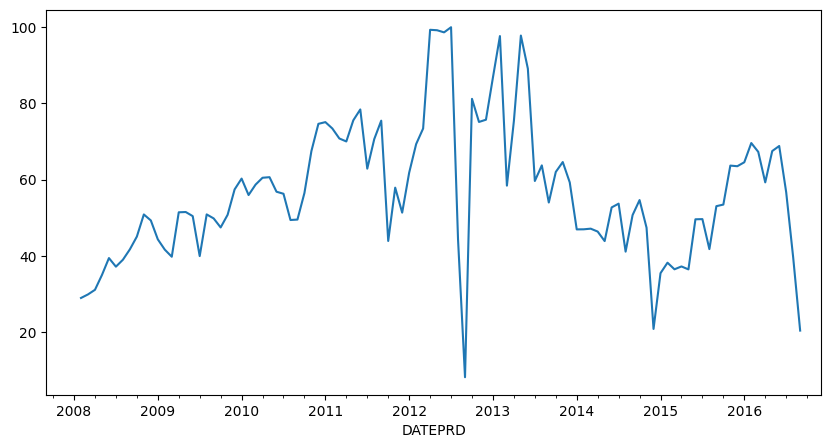

In [ ]:
fig = plt.figure(figsize=(10,5))
df_daily.AVG_CHOKE_SIZE_P.plot()

<Axes: xlabel='DATEPRD'>

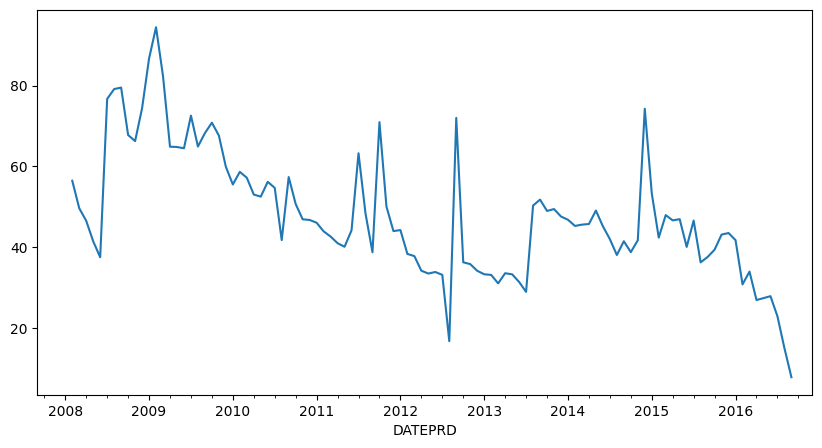

In [ ]:
fig = plt.figure(figsize=(10,5))
df_daily.AVG_WHP_P.plot()

<Axes: xlabel='DATEPRD'>

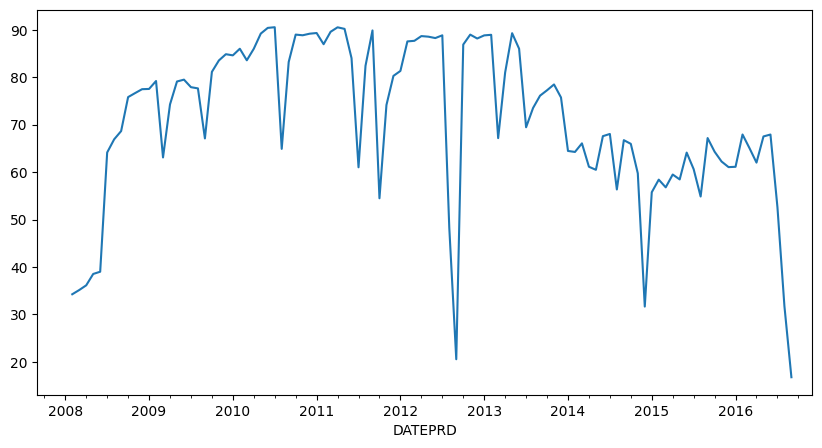

In [ ]:
fig = plt.figure(figsize=(10,5))
df_daily.AVG_WHT_P.plot()

<Axes: xlabel='DATEPRD'>

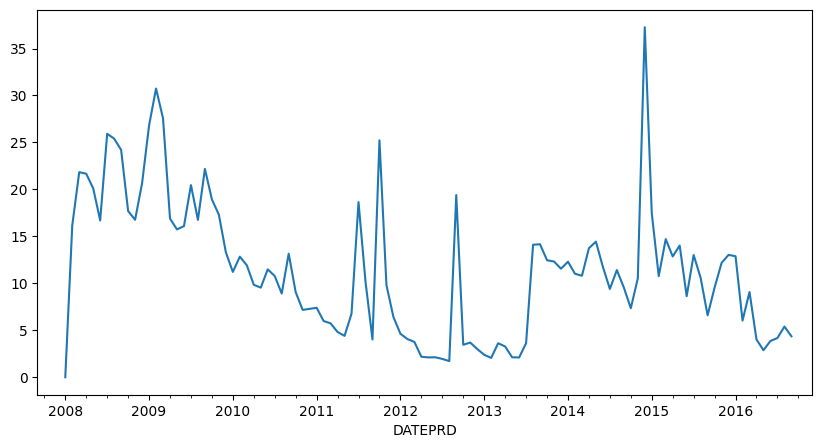

In [ ]:
fig = plt.figure(figsize=(10,5))
df_daily.DP_CHOKE_SIZE.plot()

<Axes: xlabel='DATEPRD'>

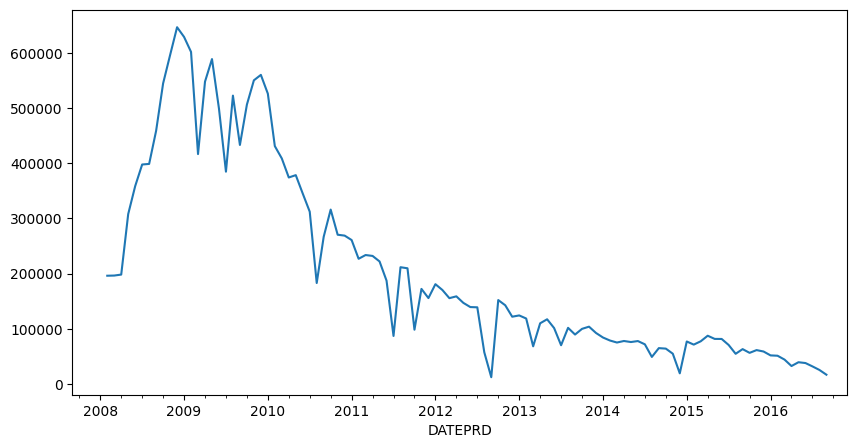

In [ ]:
fig = plt.figure(figsize=(10,5))
df_daily.BORE_GAS_VOL.plot()

<Axes: xlabel='DATEPRD'>

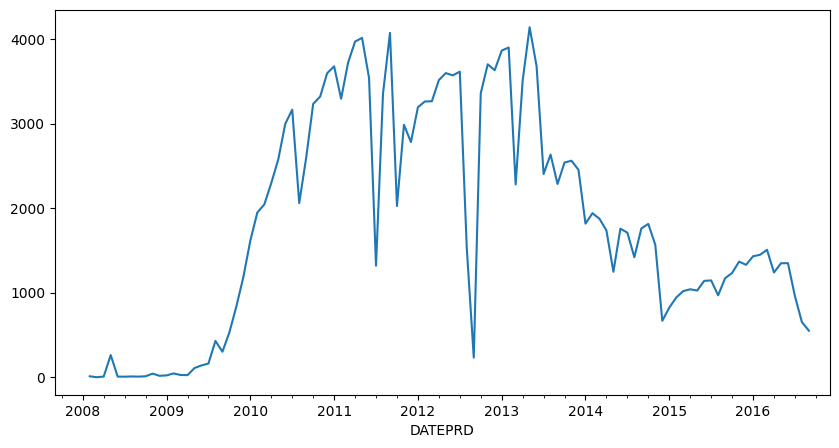

In [ ]:
fig = plt.figure(figsize=(10,5))
df_daily.BORE_WAT_VOL.plot()

Text(0.5, 1.0, 'Production History')

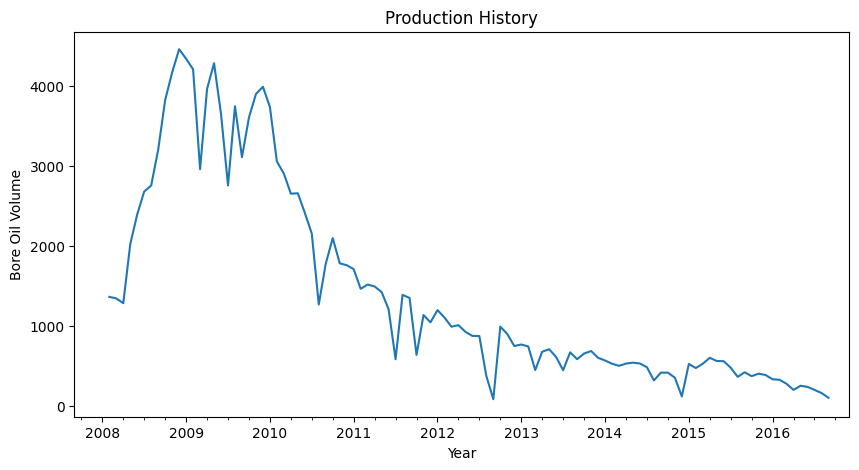

In [ ]:
fig = plt.figure(figsize=(10,5))
df_daily.BORE_OIL_VOL.plot()
plt.ylabel('Bore Oil Volume')
plt.xlabel('Year')
plt.title('Production History')

Data Cleaning

In [ ]:
#to check for missing values
df.isna().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [ ]:
#to check for the percentage of missing values
missing_values = [np.nan,'',' ',None]
df.isin(missing_values).mean().sort_values(ascending=False)*100

BORE_WI_VOL                 63.502622
AVG_ANNULUS_PRESS           49.533069
AVG_CHOKE_SIZE_P            42.951260
AVG_DOWNHOLE_PRESSURE       42.561085
AVG_DOWNHOLE_TEMPERATURE    42.561085
AVG_DP_TUBING               42.561085
AVG_WHT_P                   41.499296
AVG_WHP_P                   41.441730
BORE_WAT_VOL                41.403352
BORE_GAS_VOL                41.403352
BORE_OIL_VOL                41.403352
AVG_CHOKE_UOM               41.403352
DP_CHOKE_SIZE                1.880517
ON_STREAM_HRS                1.822950
FLOW_KIND                    0.000000
DATEPRD                      0.000000
WELL_BORE_CODE               0.000000
NPD_FACILITY_NAME            0.000000
NPD_FACILITY_CODE            0.000000
NPD_FIELD_NAME               0.000000
NPD_FIELD_CODE               0.000000
NPD_WELL_BORE_NAME           0.000000
NPD_WELL_BORE_CODE           0.000000
WELL_TYPE                    0.000000
dtype: float64

In [ ]:
#we will be dropping the categorical variables as they do not help with prediction in time series forecasting and also features whose values are not relevant to the
#prediction of oil production like AVG_CHOKE_UOM
df_new = df.drop(columns=['WELL_BORE_CODE','NPD_WELL_BORE_CODE','NPD_WELL_BORE_NAME','NPD_FIELD_CODE','NPD_FIELD_NAME','NPD_FACILITY_CODE','NPD_FACILITY_NAME','FLOW_KIND','WELL_TYPE','AVG_CHOKE_UOM','ON_STREAM_HRS','BORE_WI_VOL'])

In [ ]:
#I sorted the data by the datetime column.
df_new.sort_values(by='DATEPRD',inplace=True)
df_new.reset_index(drop=True,inplace=True)
df_new.head()

,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2007-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check time intervals
df_new['delta'] = df_new['DATEPRD'] - df_new['DATEPRD'].shift(1)
df_new[['DATEPRD', 'delta']].head()
df_new['delta'].sum(), df_new['delta'].count()


(Timedelta('3379 days 00:00:00'), 15633)

In [ ]:
#from the timedelta above it can be found that there are multiple inputs for a day so need to resample this dataset.

df_new.drop('delta',axis=1)
df_new = df_new.groupby('DATEPRD').sum()
df_new

<ipython-input-29-1cfefe240ef7>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_new = df_new.groupby('DATEPRD').sum()


,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
DATEPRD,,,,,,,,,,,
2007-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-09-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-09-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#this will give us the total production per day
df_new.reset_index(drop=False,inplace=True)
df_new.head()

,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2007-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-09-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-09-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#observing a single datapoint
df_new.iloc[2000]

DATEPRD                     2013-02-21 00:00:00
AVG_DOWNHOLE_PRESSURE                242.732269
AVG_DOWNHOLE_TEMPERATURE             101.060919
AVG_DP_TUBING                        244.283082
AVG_ANNULUS_PRESS                     36.441779
AVG_CHOKE_SIZE_P                     198.201954
AVG_WHP_P                             66.256131
AVG_WHT_P                            178.226421
DP_CHOKE_SIZE                          8.078535
BORE_OIL_VOL                             1496.1
BORE_GAS_VOL                          240926.46
BORE_WAT_VOL                            7969.09
Name: 2000, dtype: object

In [ ]:
#Investigating the missing values, the missing values were handled by aggregate sum for each day.
df_new.isna().sum()

DATEPRD                     0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
dtype: int64

Modelling

Univariate Analysis with ARIMA and Facebook Prophet

In [ ]:
#creating a univariate data for analysis
data = df_new.copy()
univariate = data[['DATEPRD','BORE_OIL_VOL']]
univariate.rename({'DATEPRD':'ds','BORE_OIL_VOL':'y'},axis=1,inplace=True)
univariate.head()

<ipython-input-33-e92d605c4268>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univariate.rename({'DATEPRD':'ds','BORE_OIL_VOL':'y'},axis=1,inplace=True)


,ds,y
0,2007-09-01,0.0
1,2007-09-02,0.0
2,2007-09-03,0.0
3,2007-09-04,0.0
4,2007-09-05,0.0


In [ ]:
df_train = univariate[:2330]
df_test = univariate[2330:]

In [ ]:
#Since there are no missing values and the timestamp is uniform throughout the dataset, we will now check for stationarity in the data. This is because the data must be stationary before
#ARIMA model can be used

In [ ]:
#this code is ran to get the ADF statisic and p-value
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

result = adfuller(df_train.y)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))



ADF Statistic: -2.079160576910202
p-value: 0.2529763735017785
Critical Values:
	1%: -3.433190172399183
	5%: -2.8627947264262703
	10%: -2.5674379473557907


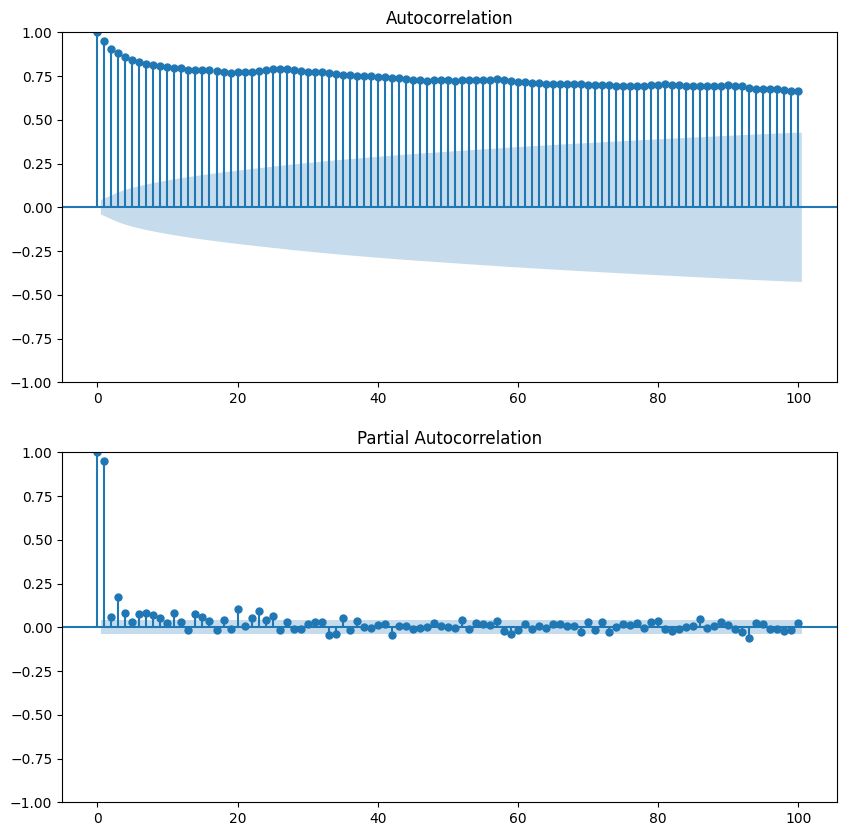

In [ ]:
#since the p-value gotten above is greater than 0.05, this means that the data is not stationary. To confirm this visually.
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

plot_acf(df_train['y'], lags=100, ax=ax[0])
plot_pacf(df_train['y'], lags=100, ax=ax[1])

plt.show()


In [ ]:
#since our p-value is greater than 0.05 and the ADF Statistic is greater than the critical values then it can be concluded that the data is not stationary

In [ ]:
#we need to apply differencing to make the data stationary and fit for an arima model prediction
df_diff = np.diff(df_train['y'])
len(df_diff)

2329

Text(0.5, 1.0, 'Production History after First Order differencing')

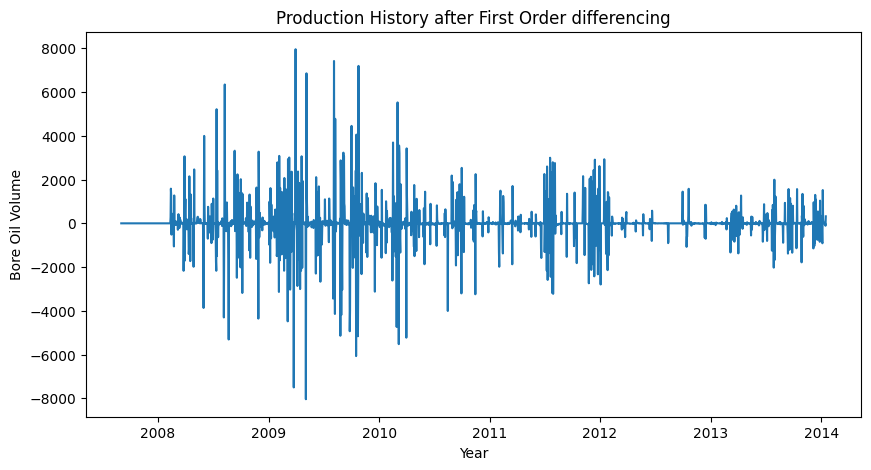

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(df_train.ds.drop([0]),df_diff)
plt.ylabel('Bore Oil Volume')
plt.xlabel('Year')
plt.title('Production History after First Order differencing')

In [ ]:
#to confirm stationary after differencing, I checked again.
result = adfuller(df_diff)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -16.726215705893534
p-value: 1.395252303027782e-29
Critical Values:
	1%: -3.433190172399183
	5%: -2.8627947264262703
	10%: -2.5674379473557907


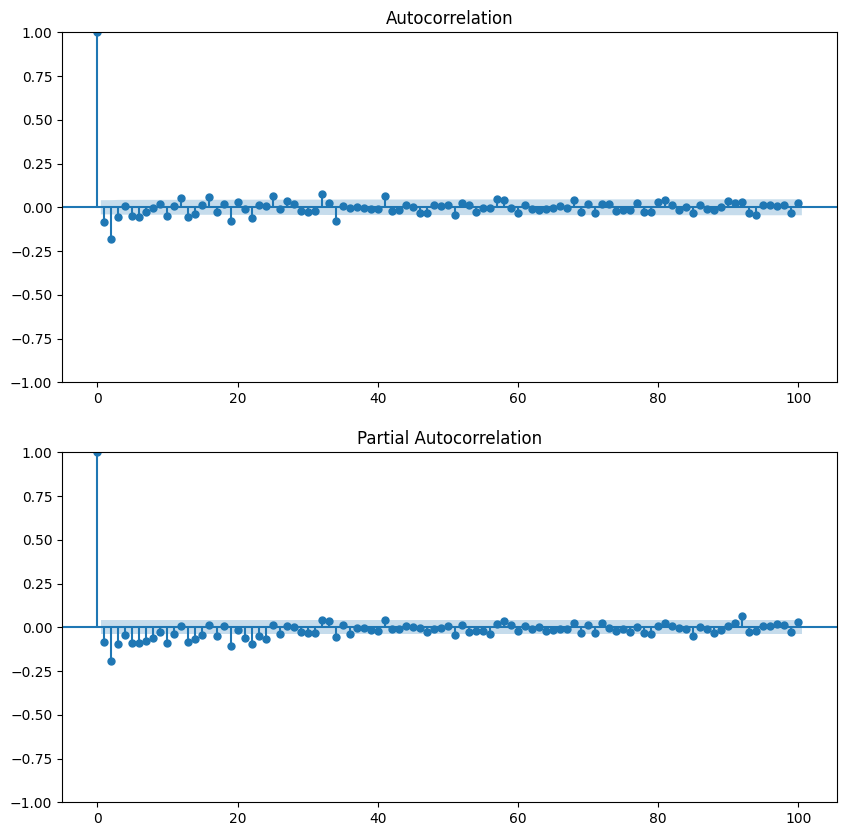

In [ ]:
#since the p-value is way less than 0.05 and the ADF statistic is less than the critical values, this means the data is stationary. To confirm visually
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plot_acf(df_diff, lags=100, ax=ax[0])
plot_pacf(df_diff, lags=100, ax=ax[1])

plt.show()


In [ ]:
#you can notice the change in the autocorrelation and partial autocorrelation plots.

In [ ]:
orders = [(1,1,1),(1,2,1),(1,2,2),(2,2,1)]
for order in orders:
  model = ARIMA(df_diff, order=order)
  model_fit = model.fit()
  pred_arima = model_fit.predict(start=len(df_train),end=len(df_train)+996)
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
  print(f'Mean Absolute Error: {mean_absolute_error(df_test.y,pred_arima)}')
  print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(df_test.y,pred_arima))}')
  print(f'R2_score: {r2_score(df_test.y,pred_arima)}')
  print('===============================================')
  print('===============================================')

Mean Absolute Error: 1891.1231012808591
Root Mean Square Error: 2057.090897329255
R2_score: -5.455210209109421
Mean Absolute Error: 1683.1981720463982
Root Mean Square Error: 1857.9448189741083
R2_score: -4.265856828228021


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Absolute Error: 1899.899573167761
Root Mean Square Error: 2064.923301258899
R2_score: -5.504460407525679
Mean Absolute Error: 1752.5294458788203
Root Mean Square Error: 1923.9329764492481
R2_score: -4.6465516046998845


In [ ]:
#the order (1,2,1) gave the best result
model = ARIMA(df_diff, order=(1,2,1))
model_fit = model.fit()

In [ ]:
pred_arima = model_fit.predict(start=len(df_train),end=len(df_train)+996)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
print(f'Mean Absolute Error: {mean_absolute_error(df_test.y,pred_arima)}')
print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(df_test.y,pred_arima))}')
print(f'R2_score: {r2_score(df_test.y,pred_arima)}')

Mean Absolute Error: 1683.1981720463982
Root Mean Square Error: 1857.9448189741083
R2_score: -4.265856828228021


In [ ]:
#Modelling with Facabook Prophet
from prophet import Prophet
model_prophet = Prophet()
model_prophet.fit(df_train)
pred_prophet = model_prophet.predict(df_test)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/0uwwux_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/3fjzuqyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44373', 'data', 'file=/tmp/tmpsewf3xi_/0uwwux_x.json', 'init=/tmp/tmpsewf3xi_/3fjzuqyd.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_model7xnr4vn4/prophet_model-20230913151737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
print(f'Mean Absolute Error: {mean_absolute_error(df_test.y,pred_prophet.yhat)}')
print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(df_test.y,pred_prophet.yhat))}')
print(f'R2_score: {r2_score(df_test.y,pred_prophet.yhat)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(df_test.y,pred_prophet.yhat)}')

Mean Absolute Error: 784.945891425125
Root Mean Square Error: 959.8150405778047
R2_score: -0.4053306776601202
Mean Absolute Percentage Error: 3.012923901914984e+17


In [ ]:
#this is a good improvement from the ARIMA model but still not desirable

Multivariate Analysis with Facebook Prophet

In [ ]:
#creating a multivariate data
data = df_new.copy()
multivariate1 = data
multivariate1.head()

,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2007-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-09-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-09-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<ipython-input-52-8836802b6c8d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(multivariate1.corr(), annot=True,annot_kws={"fontsize": 12})


<Axes: >

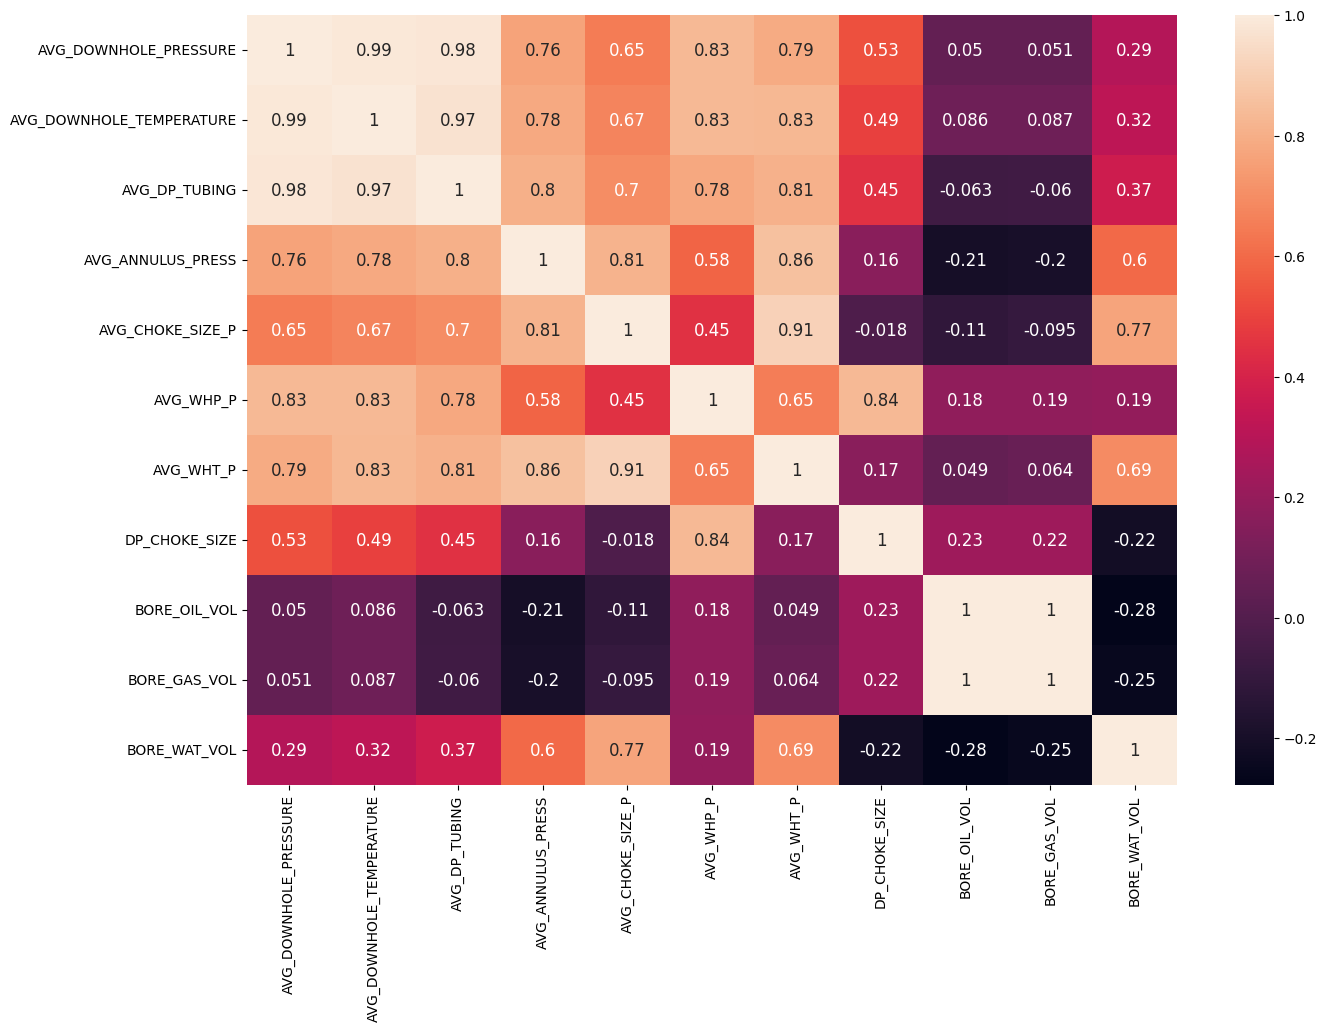

In [ ]:
#since we are now dealing with multivariate data, we need to take into consideration how these features are related to each other
fig = plt.figure(figsize=(15,10))
sns.heatmap(multivariate1.corr(), annot=True,annot_kws={"fontsize": 12})

In [ ]:
#it is observed that there 100% correlation between gas production volume and our target feature. This makes sense because oil, gas and water are produced simultaneously.
#In order to prevent data leakage and overfitting, the gas production and water production variables were removed.

multivariate1.drop(['BORE_GAS_VOL','BORE_WAT_VOL'],axis=1,inplace=True)

In [ ]:
#rename the column names for easy access and permutation.
multivariate1.rename({'DATEPRD':'ds','BORE_OIL_VOL':'y','AVG_DP_TUBING':'add1','AVG_CHOKE_SIZE_P':'add2','AVG_WHP_P':'add3','DP_CHOKE_SIZE':'add4','AVG_DOWNHOLE_TEMPERATURE':'add5',
                     'AVG_DOWNHOLE_PRESSURE':'add6','AVG_ANNULUS_PRESS':'add7','AVG_WHT_P':'add8'},axis=1,inplace=True)

In [ ]:
df_train_m = multivariate1[:2330]
df_test_m = multivariate1[2330:]
df_train_m.head()

,ds,add6,add5,add1,add7,add2,add3,add8,add4,y
0,2007-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-09-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-09-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#prophet was used to predict crude oil production by adding each feature to the ds and y dataframe.
for i in ['add2','add3','add4','add5','add6','add7','add8']:
  model_m = Prophet()
  model_m.add_regressor(i)
  model_m.fit(df_train_m)

  pred_prophet_m = model_m.predict(df_test_m)

  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
  print('============================================================================')
  print('============================================================================')
  print(f'Mean Absolute Error: {mean_absolute_error(df_test_m.y,pred_prophet_m.yhat)}')
  print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(df_test_m.y,pred_prophet_m.yhat))}')
  print(f'R2_score: {r2_score(df_test_m.y,pred_prophet_m.yhat)}')
  print('============================================================================')
  print('============================================================================')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/gxjo5e8h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/9q9kmm8e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42144', 'data', 'file=/tmp/tmpsewf3xi_/gxjo5e8h.json', 'init=/tmp/tmpsewf3xi_/9q9kmm8e.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_modelbf6q57y7/prophet_model-20230913151739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpse

Mean Absolute Error: 1196.8379823904033
Root Mean Square Error: 1411.1167502111402
R2_score: -2.0375911480946094


15:17:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/5du7hu7o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/_4fbkupu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30704', 'data', 'file=/tmp/tmpsewf3xi_/5du7hu7o.json', 'init=/tmp/tmpsewf3xi_/_4fbkupu.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_model604kbztx/prophet_model-20230913151741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Mean Absolute Error: 709.8236242825793
Root Mean Square Error: 973.4581289202215
R2_score: -0.44556617181264047


15:17:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/9oxspnqk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/0vo66vgx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84618', 'data', 'file=/tmp/tmpsewf3xi_/9oxspnqk.json', 'init=/tmp/tmpsewf3xi_/0vo66vgx.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_modeluc4k3c0i/prophet_model-20230913151742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Error: 978.1884504310609
Root Mean Square Error: 1187.8159426189115
R2_score: -1.152294641489394


15:17:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/pgujj579.json


Mean Absolute Error: 1766.0518361114623
Root Mean Square Error: 1972.0027740347496
R2_score: -4.932236647976857


DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/1y4odpy7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61695', 'data', 'file=/tmp/tmpsewf3xi_/pgujj579.json', 'init=/tmp/tmpsewf3xi_/1y4odpy7.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_modelvzsaz1ge/prophet_model-20230913151743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/k4dafo3_.json


Mean Absolute Error: 766.4868217329018
Root Mean Square Error: 1056.7443899275827
R2_score: -0.7035046613613962


DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/um1aocbw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68321', 'data', 'file=/tmp/tmpsewf3xi_/k4dafo3_.json', 'init=/tmp/tmpsewf3xi_/um1aocbw.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_model43oull89/prophet_model-20230913151744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/se_7aetn.json


Mean Absolute Error: 2019.4097807920016
Root Mean Square Error: 2537.411673720041
R2_score: -8.821668948080019


DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/5r8aoon2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41035', 'data', 'file=/tmp/tmpsewf3xi_/se_7aetn.json', 'init=/tmp/tmpsewf3xi_/5r8aoon2.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_modelzwaj7kng/prophet_model-20230913151746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error: 939.2061487200779
Root Mean Square Error: 1399.9246471068075
R2_score: -1.9895976541204905


In [ ]:
#prophet was used to predict crude oil production by each of the other features to the dataframe consisting of ds,y and add2.
for i in ['add3','add4','add5','add6','add7','add8']:
  model_m = Prophet()
  model_m.add_regressor('add2')
  model_m.add_regressor(i)
  model_m.fit(df_train_m)

  pred_prophet_m = model_m.predict(df_test_m)

  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
  print('============================================================================')
  print('============================================================================')
  print(f'Mean Absolute Error: {mean_absolute_error(df_test_m.y,pred_prophet_m.yhat)}')
  print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(df_test_m.y,pred_prophet_m.yhat))}')
  print(f'R2_score: {r2_score(df_test_m.y,pred_prophet_m.yhat)}')
  print('============================================================================')
  print('============================================================================')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/ttcd_mxb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/yxrdjinu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88563', 'data', 'file=/tmp/tmpsewf3xi_/ttcd_mxb.json', 'init=/tmp/tmpsewf3xi_/yxrdjinu.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_model23yv5r62/prophet_model-20230913151747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpse

Mean Absolute Error: 1103.2736789612582
Root Mean Square Error: 1355.416080940543
R2_score: -1.8025198170781276


15:17:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/iqbjkj4j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/3anweade.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81685', 'data', 'file=/tmp/tmpsewf3xi_/iqbjkj4j.json', 'init=/tmp/tmpsewf3xi_/3anweade.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_modelq3eifkjz/prophet_model-20230913151750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Mean Absolute Error: 1177.9859741958403
Root Mean Square Error: 1402.5919160878868
R2_score: -2.00100063580714


15:17:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/9_qap6i4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/d1u3tln9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Mean Absolute Error: 1291.5076271432538
Root Mean Square Error: 1597.2237370065404
R2_score: -2.8916604078354893


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12767', 'data', 'file=/tmp/tmpsewf3xi_/9_qap6i4.json', 'init=/tmp/tmpsewf3xi_/d1u3tln9.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_modeloldk3gw5/prophet_model-20230913151751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/4ulzc675.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/747royj4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26541', 'data',

Mean Absolute Error: 1148.8943192302002
Root Mean Square Error: 1424.1241733273457
R2_score: -2.0938491962972248


15:17:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/evy4qyow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/tow5_a99.json


Mean Absolute Error: 1202.3523099442646
Root Mean Square Error: 1590.653447745077
R2_score: -2.8597090369775175


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48653', 'data', 'file=/tmp/tmpsewf3xi_/evy4qyow.json', 'init=/tmp/tmpsewf3xi_/tow5_a99.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_modelt_3u8mr5/prophet_model-20230913151753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error: 954.5469101577286
Root Mean Square Error: 1334.6783308283789
R2_score: -1.7174192245935465


In [ ]:
#prophet was used to predict crude oil production by each of the other features to the dataframe consisting of ds,y,add2 and add3
for i in ['add4','add5','add6','add7','add8']:
  model_m = Prophet()
  model_m.add_regressor('add2')
  model_m.add_regressor('add3')
  model_m.add_regressor(i)
  model_m.fit(df_train_m)

  pred_prophet_m = model_m.predict(df_test_m)

  from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
  print('============================================================================')
  print('============================================================================')
  print(f'Mean Absolute Error: {mean_absolute_error(df_test_m.y,pred_prophet_m.yhat)}')
  print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(df_test_m.y,pred_prophet_m.yhat))}')
  print(f'R2_score: {r2_score(df_test_m.y,pred_prophet_m.yhat)}')
  print('============================================================================')
  print('============================================================================')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/v30mdp96.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/s9njujnv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46547', 'data', 'file=/tmp/tmpsewf3xi_/v30mdp96.json', 'init=/tmp/tmpsewf3xi_/s9njujnv.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_model7xbjwwu4/prophet_model-20230913151754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpse

Mean Absolute Error: 964.5047460535095
Root Mean Square Error: 1303.1266194429813
R2_score: -1.5904586076781202


15:17:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/doyx4frk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/itwk264u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25849', 'data', 'file=/tmp/tmpsewf3xi_/doyx4frk.json', 'init=/tmp/tmpsewf3xi_/itwk264u.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_modelqhn9j6le/prophet_model-20230913151756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Error: 1285.8496965452553
Root Mean Square Error: 1594.9764489566483
R2_score: -2.880717007540618


15:17:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/okb_3lkb.json


Mean Absolute Error: 1134.7356884058527
Root Mean Square Error: 1400.5420634625086
R2_score: -1.9922352725521195


DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/4ml3rxmq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45064', 'data', 'file=/tmp/tmpsewf3xi_/okb_3lkb.json', 'init=/tmp/tmpsewf3xi_/4ml3rxmq.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_modelk7hb33tg/prophet_model-20230913151757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/2zuo4kmc.json


Mean Absolute Error: 1113.6904452824717
Root Mean Square Error: 1495.6317711684967
R2_score: -2.4123438633280245


DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/0umiuqim.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65440', 'data', 'file=/tmp/tmpsewf3xi_/2zuo4kmc.json', 'init=/tmp/tmpsewf3xi_/0umiuqim.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_modeliz5coh54/prophet_model-20230913151759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error: 969.8163339941615
Root Mean Square Error: 1331.2646120993556
R2_score: -1.703536266598734


In [ ]:
#prophet was used to predict crude oil production by each of the other features to the dataframe consisting of ds,y,add2,add3 and add4
for i in ['add5','add6','add7','add8']:
  model_m = Prophet()
  model_m.add_regressor('add2')
  model_m.add_regressor('add3')
  model_m.add_regressor('add4')
  model_m.add_regressor(i)
  model_m.fit(df_train_m)

  pred_prophet_m = model_m.predict(df_test_m)

  from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
  print('============================================================================')
  print('============================================================================')
  print(f'Mean Absolute Error: {mean_absolute_error(df_test_m.y,pred_prophet_m.yhat)}')
  print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(df_test_m.y,pred_prophet_m.yhat))}')
  print(f'R2_score: {r2_score(df_test_m.y,pred_prophet_m.yhat)}')
  print('============================================================================')
  print('============================================================================')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/4q4peok7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/6tn9ed3q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51041', 'data', 'file=/tmp/tmpsewf3xi_/4q4peok7.json', 'init=/tmp/tmpsewf3xi_/6tn9ed3q.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_modelmv8ezu79/prophet_model-20230913151801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpse

Mean Absolute Error: 1268.7631144142747
Root Mean Square Error: 1567.3666175747378
R2_score: -2.747525614456899


DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/fudjzvx2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16887', 'data', 'file=/tmp/tmpsewf3xi_/c0o_bbgn.json', 'init=/tmp/tmpsewf3xi_/fudjzvx2.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_modeluchtmr0m/prophet_model-20230913151802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/70fgs0dy.json


Mean Absolute Error: 1028.8986885372778
Root Mean Square Error: 1355.4458014223158
R2_score: -1.8026427212600917


DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/rnm1gqmn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51601', 'data', 'file=/tmp/tmpsewf3xi_/70fgs0dy.json', 'init=/tmp/tmpsewf3xi_/rnm1gqmn.json', 'output', 'file=/tmp/tmpsewf3xi_/prophet_modelmhanqn48/prophet_model-20230913151803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/i6x4j7bh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsewf3xi_/39xefevl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Mean Absolute Error: 975.4447930590565
Root Mean Square Error: 1357.1974901145581
R2_score: -1.8098913029782495


15:18:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error: 948.2431089637964
Root Mean Square Error: 1316.74957132498
R2_score: -1.6449032833634414


In [ ]:
#since the results are not getting any better we can stop here and move a better technique using machine learning algorithms

Modelling with Machine Learning Algorithms

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer

In [ ]:
x = df_new.drop(['DATEPRD','BORE_OIL_VOL','BORE_GAS_VOL','BORE_WAT_VOL',],axis=1)
y = df_new.BORE_OIL_VOL

#normalizing the data using minmaxscaler
scaler = MinMaxScaler()
x_ = scaler.fit_transform(x)
x = pd.DataFrame(x_,columns=x.columns)
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.3)


In [ ]:
# putting models in a dictionary
models = {"XGBoost Regressor": XGBRegressor(),
          "DecisionTree Regressor": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "Catboost": CatBoostRegressor(),
          "gradientboosting": GradientBoostingRegressor(),
          "KNeighborsRegressor": KNeighborsRegressor(),
          "Ridge": Ridge(),
          "SVR": SVR(),
          "LinearRegression": LinearRegression(),
         }

# setting up a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fits and evaluates given machine learning models
    models: a dictionary of different scikit learn machine learning models
    X_train: training data (no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: testing labels
    """
    #setting up a random seed
    np.random.seed(4)

    # making a dictionary to keep model scores
    mae_ = {}
    rmse_ = {}
    r2score_ = {}
    #looping through models
    for name, model in models.items():
        #fitting the model to the data
        model.fit(x_train, y_train)
        # evaluating the model and appending its mae to model_scores
        y_pred = model.predict(x_test)
        mae = mean_absolute_error(y_test,y_pred)
        rmse = np.sqrt(mean_squared_error(y_test,y_pred))
        r2score = r2_score(y_test,y_pred)
        mae_[name] = mae
        rmse_[name] = rmse
        r2score_[name] = r2score
    print('======================================')
    print('======================================')
    print('Mean Absolute Error')
    print(mae_)
    print('======================================')
    print('======================================')
    print('Root Mean Squared Error')
    print(rmse_)
    print('======================================')
    print('======================================')
    print('R2_Score')
    print(r2score_)
    print('======================================')
    print('======================================')




In [ ]:
%%time
scores = fit_and_score(models=models,
                             X_train=x_train,
                             X_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
scores

Learning rate set to 0.046791
0:	learn: 2400.4081792	total: 2.01ms	remaining: 2.01s
1:	learn: 2310.0786813	total: 3.92ms	remaining: 1.96s
2:	learn: 2228.3756483	total: 5.8ms	remaining: 1.93s
3:	learn: 2147.7791400	total: 7.63ms	remaining: 1.9s
4:	learn: 2069.4953770	total: 9.44ms	remaining: 1.88s
5:	learn: 1995.9262804	total: 11.3ms	remaining: 1.88s
6:	learn: 1926.4182928	total: 13.2ms	remaining: 1.86s
7:	learn: 1860.5599087	total: 14.9ms	remaining: 1.85s
8:	learn: 1796.1891650	total: 16.8ms	remaining: 1.85s
9:	learn: 1737.5652901	total: 18.6ms	remaining: 1.84s
10:	learn: 1679.9240972	total: 20.5ms	remaining: 1.84s
11:	learn: 1630.5325090	total: 22.4ms	remaining: 1.84s
12:	learn: 1578.2365367	total: 24.2ms	remaining: 1.84s
13:	learn: 1526.5526194	total: 26.2ms	remaining: 1.84s
14:	learn: 1480.3942225	total: 28.2ms	remaining: 1.85s
15:	learn: 1434.5615555	total: 30.3ms	remaining: 1.86s
16:	learn: 1392.9087373	total: 32.3ms	remaining: 1.87s
17:	learn: 1353.5983995	total: 34.4ms	remaining

In [ ]:
#looking at the above mae scores of the models above, random forest classifier performed best
#we analyze further this further

#random forest model
rf_model = RandomForestRegressor(random_state=4)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_mae = mean_absolute_error(y_test,rf_pred)
print(rf_mae)
feature_names = x_train.columns
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df


186.58123869933428


,Feature,Importance
2,AVG_DP_TUBING,0.350578
7,DP_CHOKE_SIZE,0.243296
1,AVG_DOWNHOLE_TEMPERATURE,0.161659
4,AVG_CHOKE_SIZE_P,0.109458
6,AVG_WHT_P,0.043547
3,AVG_ANNULUS_PRESS,0.039860
5,AVG_WHP_P,0.030327
0,AVG_DOWNHOLE_PRESSURE,0.021275


In [ ]:
#the AVG_WHT_P and AVG_WHP_P features were dropped because the combination of other features resulted in a more accurate prediction
x = df_new.drop(['DATEPRD','BORE_OIL_VOL','BORE_GAS_VOL','BORE_WAT_VOL','AVG_WHT_P','AVG_WHP_P'],axis=1)
y = df_new.BORE_OIL_VOL

#normalizing the data using minmaxscaler
scaler = MinMaxScaler()
x_ = scaler.fit_transform(x)
x = pd.DataFrame(x_,columns=x.columns)
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.3)


In [ ]:

#random forest model
rf_model = RandomForestRegressor(random_state=4)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_mae = mean_absolute_error(y_test,rf_pred)
print(rf_mae)

173.70276388007034


In [ ]:
#we analyze further the top three performing model

#CAT BOOST model
ct_model = CatBoostRegressor(random_state=4)
ct_model.fit(x_train, y_train)
ct_pred = ct_model.predict(x_test)
ct_mae = mean_absolute_error(y_test,ct_pred)
print(ct_mae)


Learning rate set to 0.046791
0:	learn: 2402.9365136	total: 4.48ms	remaining: 4.47s
1:	learn: 2315.9070684	total: 8.55ms	remaining: 4.27s
2:	learn: 2232.4114956	total: 15.1ms	remaining: 5s
3:	learn: 2149.9027166	total: 20.2ms	remaining: 5.03s
4:	learn: 2070.6421972	total: 26.5ms	remaining: 5.28s
5:	learn: 1994.1755493	total: 33.5ms	remaining: 5.55s
6:	learn: 1925.3355282	total: 39.7ms	remaining: 5.63s
7:	learn: 1858.6242991	total: 44.3ms	remaining: 5.49s
8:	learn: 1796.5152630	total: 50.4ms	remaining: 5.55s
9:	learn: 1737.0364028	total: 56.3ms	remaining: 5.57s
10:	learn: 1682.1644934	total: 62ms	remaining: 5.57s
11:	learn: 1626.7481959	total: 67.8ms	remaining: 5.58s
12:	learn: 1575.6224762	total: 73.8ms	remaining: 5.6s
13:	learn: 1524.0867685	total: 79.5ms	remaining: 5.6s
14:	learn: 1480.0908369	total: 85.5ms	remaining: 5.62s
15:	learn: 1433.8104434	total: 91.3ms	remaining: 5.61s
16:	learn: 1391.5933760	total: 96.8ms	remaining: 5.6s
17:	learn: 1349.8279085	total: 104ms	remaining: 5.66s

In [ ]:
#we analyze further the top three performing model

#XGB model
xgb_model = XGBRegressor(random_state=4)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)
xgb_mae = mean_absolute_error(y_test,xgb_pred)
print(xgb_mae)


197.41029810909185


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score

# Define the individual models to stack
estimators = [('rf', RandomForestRegressor(random_state=4)),
              ('cbr', CatBoostRegressor(random_state=4)),
              ('xgb',XGBRegressor(random_state=4))]

# Define the stacking regressor
stacking_reg = StackingRegressor(estimators=estimators,final_estimator=RidgeCV())

# Train the stacking regressor on your data
stacking_reg.fit(x_train, y_train)

# Evaluate the stacking regressor using cross-validation
#scores = cross_val_score(stacking_reg, x_test, y_test, cv=5)
stack_pred = stacking_reg.predict(x_test)
print('============================================================================')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,stack_pred)}')
print('============================================================================')
print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(y_test,stack_pred))}')
print('============================================================================')
print(f'R2_score: {r2_score(y_test,stack_pred)}')
print('============================================================================')

Streaming output truncated to the last 5000 lines.
11:	learn: 1646.5504633	total: 67.5ms	remaining: 5.56s
12:	learn: 1594.9634723	total: 70.2ms	remaining: 5.33s
13:	learn: 1545.1221244	total: 72ms	remaining: 5.07s
14:	learn: 1494.9858984	total: 74.3ms	remaining: 4.88s
15:	learn: 1451.8836061	total: 77.3ms	remaining: 4.76s
16:	learn: 1411.0591946	total: 79ms	remaining: 4.57s
17:	learn: 1369.7909645	total: 81.4ms	remaining: 4.44s
18:	learn: 1331.8606035	total: 84.4ms	remaining: 4.36s
19:	learn: 1296.4179570	total: 87.3ms	remaining: 4.28s
20:	learn: 1260.1831197	total: 90.1ms	remaining: 4.2s
21:	learn: 1226.8721210	total: 91.9ms	remaining: 4.08s
22:	learn: 1195.3638193	total: 93.6ms	remaining: 3.98s
23:	learn: 1163.8081433	total: 95.3ms	remaining: 3.88s
24:	learn: 1138.1618098	total: 98.4ms	remaining: 3.84s
25:	learn: 1108.8626399	total: 101ms	remaining: 3.79s
26:	learn: 1082.9799003	total: 103ms	remaining: 3.72s
27:	learn: 1058.1578029	total: 105ms	remaining: 3.64s
28:	learn: 1032.906535

In [ ]:
#the stacking regressor at the competition time gave a result that was a little better randomforest, I think 172.

In [ ]:
#Visualization of results for presentation slides (tampered with the numbers a little to show slight differences in the bars for the plot)

In [ ]:
models = ['Arima', 'Prophet', 'Xgboost' , 'Catboost', 'Random Forest', 'Stacked']
results = [1303.2,709.82,200,190,180,167.89]

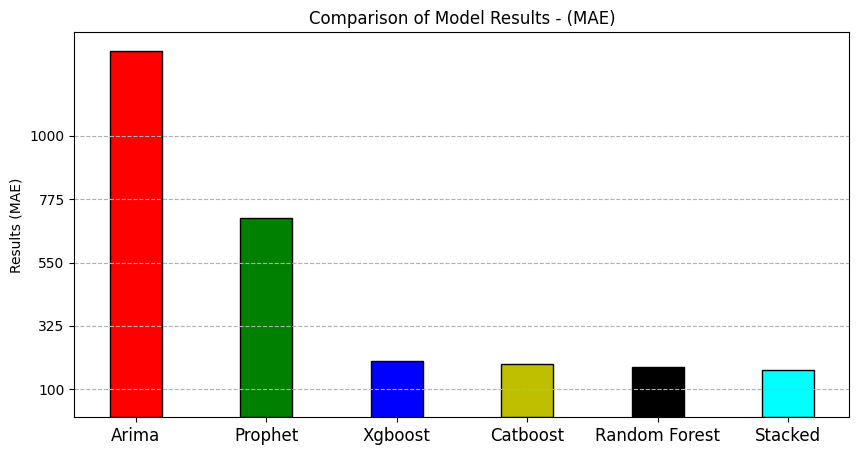

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(models))
colors = ['r', 'g', 'b', 'y','black','cyan']
ax.bar(x, results, color=colors, edgecolor='black', width=0.4)

# Set the x-axis labels and tick positions
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)

# Set the y-axis label
ax.set_ylabel('Results (MAE)')

# Add a title
ax.set_title('Comparison of Model Results - (MAE)')

# Add gridlines
ax.grid(axis='y', linestyle='--')

y_ticks = np.linspace(100,1000,5)
ax.set_yticks(y_ticks)

plt.show()


(-1.0, 1.0)

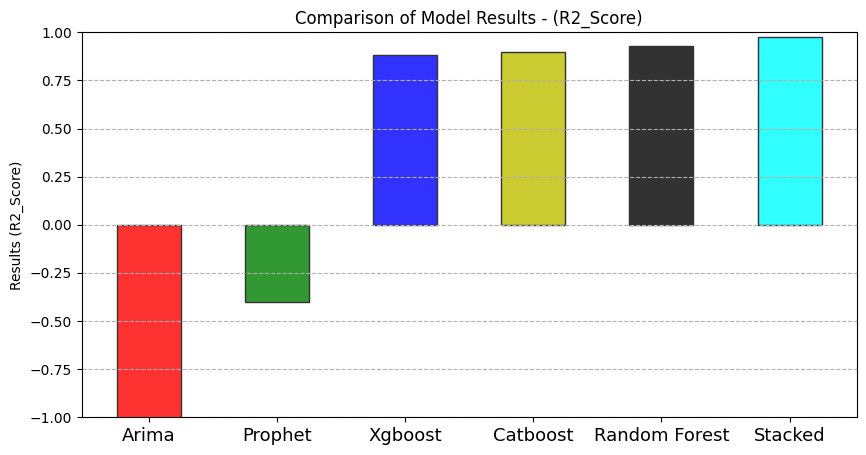

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(models))
result = [-4.27, -0.4, 0.88, 0.90, 0.93, 0.975]
colors = ['r', 'g', 'b', 'y','black','cyan']
ax.bar(x, result, color=colors, edgecolor='black', width=0.5)

# Set the x-axis labels and tick positions
ax.set_xticks(x)
ax.set_xticklabels(models,fontsize=13)

# Set the y-axis label
ax.set_ylabel('Results (R2_Score)')

# Add a title
ax.set_title('Comparison of Model Results - (R2_Score)')

# Add gridlines
ax.grid(axis='y', linestyle='--')

#y_ticks = np.linspace(-5,1,1)
#ax.set_yticks(y_ticks)
#ax.set_ylim(-4.5, 1.0)

# Customize each half of the y-axis with a different color
ax.axhspan(0, ax.get_ylim()[1], facecolor='w', alpha=0.2)
ax.axhspan(ax.get_ylim()[0], 0, facecolor='w', alpha=0.2)

## Set the limits of the y-axis to be centered at 0
ax.set_ylim([-1, 1])



Hyparameter Tuning (it wasnt giving any better result as such and it was taking too much time)



In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=4)
# Define the hyperparameters to tune
param_grid = {'bootstrap': [True, False],
                'max_depth': [10, 20,None],
                'max_features': ['log2', 'sqrt'],
                'min_samples_leaf': [1, 2],
                'min_samples_split': [2, 5],
                'n_estimators': [100,200]
}
# Define the scoring metric
#scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Define the grid search object
grid_search = GridSearchCV(rf, param_grid, cv = 5)

# Train the grid search object on your data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and score
print('Best hyperparameters: {}'.format(best_params))
print('Best score: {:.2f}'.format(best_score))

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = parameters = {'depth': [4,5,6,7,810],
                 'learning_rate': [0.001,0.02],
                  'iterations': [1000,1500,2000]
                 }


# Create a based model
clf = CatBoostRegressor(random_state=4)

#scorer = make_scorer(mean_absolute_error, greater_is_better=False)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and score
print('Best hyperparameters: {}'.format(best_params))
print('Best score: {:.2f}'.format(-best_score))

Streaming output truncated to the last 5000 lines.
1066:	learn: 1184.4423445	total: 3.15s	remaining: 1.28s
1067:	learn: 1183.7530507	total: 3.15s	remaining: 1.27s
1068:	learn: 1183.1316502	total: 3.15s	remaining: 1.27s
1069:	learn: 1182.4482776	total: 3.15s	remaining: 1.27s
1070:	learn: 1181.7186952	total: 3.16s	remaining: 1.26s
1071:	learn: 1180.9823670	total: 3.16s	remaining: 1.26s
1072:	learn: 1180.3020884	total: 3.16s	remaining: 1.26s
1073:	learn: 1179.6568091	total: 3.17s	remaining: 1.26s
1074:	learn: 1178.9815757	total: 3.17s	remaining: 1.25s
1075:	learn: 1178.2850335	total: 3.17s	remaining: 1.25s
1076:	learn: 1177.5980849	total: 3.18s	remaining: 1.25s
1077:	learn: 1176.9661058	total: 3.18s	remaining: 1.24s
1078:	learn: 1176.2432786	total: 3.18s	remaining: 1.24s
1079:	learn: 1175.5659079	total: 3.18s	remaining: 1.24s
1080:	learn: 1174.8663682	total: 3.19s	remaining: 1.24s
1081:	learn: 1174.2559730	total: 3.19s	remaining: 1.23s
1082:	learn: 1173.5865396	total: 3.19s	remaining: 1.2

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor(random_state=4)
# Define the hyperparameters to tune
param_grid = {'max_depth': [10, 20, 30, 40],
              'learning_rate':[0.001,0.01,0.1],
                'gamma': [0,2,4,6],
                'min_child_weight': [1, 2, 3, 4]
}
# Define the scoring metric
#scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Define the grid search object
grid_search = GridSearchCV(xgb, param_grid, cv = 5)

# Train the grid search object on your data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and score
print('Best hyperparameters: {}'.format(best_params))
print('Best score: {:.2f}'.format(best_score))